In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the Titanic dataset from seaborn
df = sns.load_dataset('titanic')

# Display the first 5 rows
print("First 5 rows of the dataset:")
display(df.head())

# Get basic information about the dataset
print("\nDataset Information:")
df.info()

# Check for the total number of null values in each column
print("\nMissing values in each column:")
print(df.isnull().sum())

First 5 rows of the dataset:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB

Missing values in each column:
survived         0
pclass

In [3]:
# Fill missing 'age' values with the median
age_median = df['age'].median()
df['age'].fillna(age_median, inplace=True)
print(f"Filled missing 'age' values with median: {age_median}")

# Fill missing 'embarked' and 'embark_town' values with the mode
embarked_mode = df['embarked'].mode()[0]
df['embarked'].fillna(embarked_mode, inplace=True)
df['embark_town'].fillna(df['embark_town'].mode()[0], inplace=True)
print(f"Filled missing 'embarked' values with mode: {embarked_mode}")

# Drop the 'deck' column because it has too many missing values
df.drop('deck', axis=1, inplace=True)
print("\n'deck' column has been dropped.")

# Verify that there are no more missing values
print("\nMissing values after handling:")
print(df.isnull().sum())

Filled missing 'age' values with median: 28.0
Filled missing 'embarked' values with mode: S

'deck' column has been dropped.

Missing values after handling:
survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64


C:\Users\samee\AppData\Local\Temp\ipykernel_15944\1215974118.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(age_median, inplace=True)
C:\Users\samee\AppData\Local\Temp\ipykernel_15944\1215974118.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

In [5]:
# Convert categorical columns to numerical using one-hot encoding
# We drop the first category of each feature to avoid multicollinearity
df_encoded = pd.get_dummies(df, columns=['sex', 'embarked', 'class', 'who', 'embark_town', 'adult_male'], drop_first=True)

# The 'alone' column is already boolean (True/False), which can be converted to 1/0
df_encoded['alone'] = df_encoded['alone'].astype(int)

# Drop original non-numeric columns that have been encoded or are not needed
df_processed = df_encoded.drop(['pclass', 'survived'], axis=1, errors='ignore') # dropping original pclass if it's still there

print("Dataset after one-hot encoding categorical features:")
display(df_processed.head())
print("\nData types after encoding:")
df_processed.info()

Dataset after one-hot encoding categorical features:


,age,sibsp,parch,fare,alive,alone,sex_male,embarked_Q,embarked_S,class_Second,class_Third,who_man,who_woman,embark_town_Queenstown,embark_town_Southampton,adult_male_True
0,22.0,1,0,7.2500,no,0,True,False,True,False,True,True,False,False,True,True
1,38.0,1,0,71.2833,yes,0,False,False,False,False,False,False,True,False,False,False
2,26.0,0,0,7.9250,yes,1,False,False,True,False,True,False,True,False,True,False
3,35.0,1,0,53.1000,yes,0,False,False,True,False,False,False,True,False,True,False
4,35.0,0,0,8.0500,no,1,True,False,True,False,True,True,False,False,True,True



Data types after encoding:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      891 non-null    float64
 1   sibsp                    891 non-null    int64  
 2   parch                    891 non-null    int64  
 3   fare                     891 non-null    float64
 4   alive                    891 non-null    object 
 5   alone                    891 non-null    int64  
 6   sex_male                 891 non-null    bool   
 7   embarked_Q               891 non-null    bool   
 8   embarked_S               891 non-null    bool   
 9   class_Second             891 non-null    bool   
 10  class_Third              891 non-null    bool   
 11  who_man                  891 non-null    bool   
 12  who_woman                891 non-null    bool   
 13  embark_town_Queenstown   891 non-null    bool   
 14

In [6]:
# Identify numerical columns to scale
numerical_features = ['age', 'fare', 'sibsp', 'parch']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical features
df_processed[numerical_features] = scaler.fit_transform(df_processed[numerical_features])

print("Dataset after standardizing numerical features:")
display(df_processed.head())

print("\nDescription of scaled features:")
display(df_processed[numerical_features].describe())

Dataset after standardizing numerical features:


,age,sibsp,parch,fare,alive,alone,sex_male,embarked_Q,embarked_S,class_Second,class_Third,who_man,who_woman,embark_town_Queenstown,embark_town_Southampton,adult_male_True
0,-0.565736,0.432793,-0.473674,-0.502445,no,0,True,False,True,False,True,True,False,False,True,True
1,0.663861,0.432793,-0.473674,0.786845,yes,0,False,False,False,False,False,False,True,False,False,False
2,-0.258337,-0.474545,-0.473674,-0.488854,yes,1,False,False,True,False,True,False,True,False,True,False
3,0.433312,0.432793,-0.473674,0.420730,yes,0,False,False,True,False,False,False,True,False,True,False
4,0.433312,-0.474545,-0.473674,-0.486337,no,1,True,False,True,False,True,True,False,False,True,True



Description of scaled features:


,age,fare,sibsp,parch
count,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02
mean,2.272780e-16,3.987333e-18,4.386066e-17,5.382900e-17
std,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00
min,-2.224156e+00,-6.484217e-01,-4.745452e-01,-4.736736e-01
25%,-5.657365e-01,-4.891482e-01,-4.745452e-01,-4.736736e-01
50%,-1.046374e-01,-3.573909e-01,-4.745452e-01,-4.736736e-01
75%,4.333115e-01,-2.424635e-02,4.327934e-01,-4.736736e-01
max,3.891554e+00,9.667167e+00,6.784163e+00,6.974147e+00


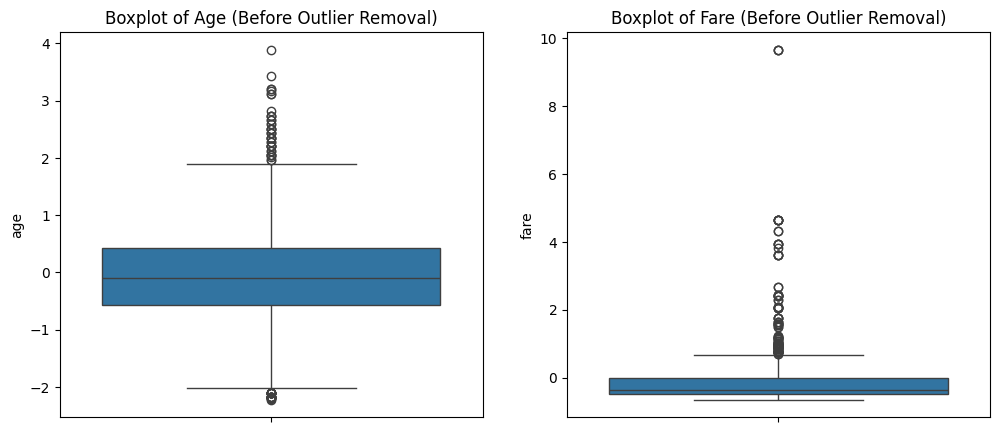

Shape of data before removing outliers: (891, 16)
Shape of data after removing outliers: (721, 16)


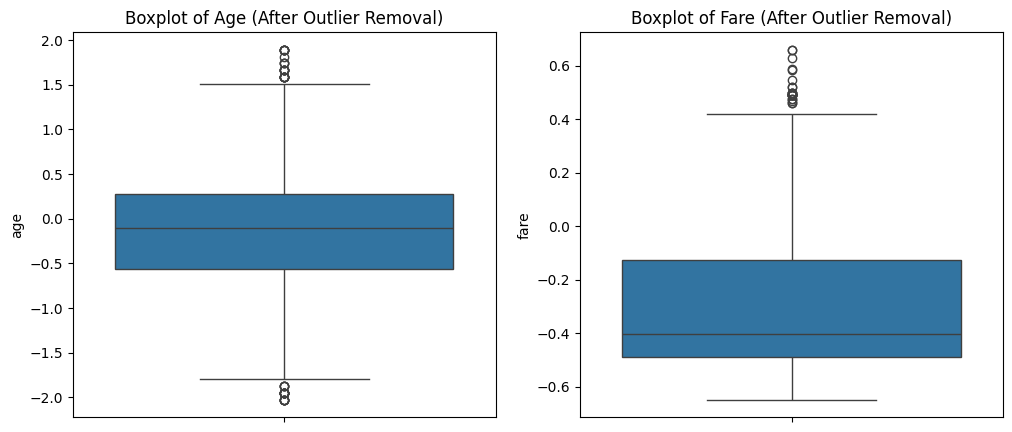

In [7]:
# Visualize outliers using boxplots before removal
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(y=df_processed['age'])
plt.title('Boxplot of Age (Before Outlier Removal)')

plt.subplot(1, 2, 2)
sns.boxplot(y=df_processed['fare'])
plt.title('Boxplot of Fare (Before Outlier Removal)')
plt.show()

# --- Outlier Removal using IQR ---
print(f"Shape of data before removing outliers: {df_processed.shape}")

# Calculate Q1, Q3, and IQR for 'fare'
Q1_fare = df_processed['fare'].quantile(0.25)
Q3_fare = df_processed['fare'].quantile(0.75)
IQR_fare = Q3_fare - Q1_fare
lower_bound_fare = Q1_fare - 1.5 * IQR_fare
upper_bound_fare = Q3_fare + 1.5 * IQR_fare

# Calculate Q1, Q3, and IQR for 'age'
Q1_age = df_processed['age'].quantile(0.25)
Q3_age = df_processed['age'].quantile(0.75)
IQR_age = Q3_age - Q1_age
lower_bound_age = Q1_age - 1.5 * IQR_age
upper_bound_age = Q3_age + 1.5 * IQR_age


# Filter out the outliers
df_no_outliers = df_processed[
    (df_processed['fare'] >= lower_bound_fare) & (df_processed['fare'] <= upper_bound_fare) &
    (df_processed['age'] >= lower_bound_age) & (df_processed['age'] <= upper_bound_age)
]

print(f"Shape of data after removing outliers: {df_no_outliers.shape}")

# Visualize data after removing outliers
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(y=df_no_outliers['age'])
plt.title('Boxplot of Age (After Outlier Removal)')

plt.subplot(1, 2, 2)
sns.boxplot(y=df_no_outliers['fare'])
plt.title('Boxplot of Fare (After Outlier Removal)')
plt.show()